Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nhat Pham"
COLLABORATORS = ""

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [181]:
import timeit
import random

eps = 1e-16

locations = [0.0, 0.5, 1.0 - eps]

# find the median of three values x1, x2, x3.
#Input: a list of 3 number
#Output: the median number of three inputs
def median(x1, x2, x3):
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

#define quickshort function
#input: an arbitrary list
#output: sorted list

def qsort(lst):
    indices = [(0, len(lst))] #indice is a tuple of 2 elements

    while indices: #while indice is not empty
        (frm, to) = indices.pop() #assign from = 0 and to = len(lst)
        if frm == to: #if from = to skip the following operations
            continue

        # Find the partition:
        N = to - frm #N is the number of element in the list
        inds = [frm + int(N * n) for n in locations] #inds is a list of values following this rule
        values = [lst[ind] for ind in inds] #[a list of elements in the list whose indexes are in inds]
        partition = median(*values) #partition is the median value of the list values

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #split the list to 2 using the median threshold
        upper = [a for a in lst[frm:to] if a > partition]
        #count the frequence of the median value in the list
        counts = sum([1 for a in lst[frm:to] if a == partition]) 

        ind1 = frm + len(lower) #the ending index of list 1
        ind2 = ind1 + counts #the ending index of the sublist of all median values (in line 48)

        # Push back into correct place:
        lst[frm:ind1] = lower #first part having all value smaller than the median value
        lst[ind1:ind2] = [partition] * counts #the median value
        lst[ind2:to] = upper #the third part of having all values larger the median value

        # Enqueue other locations
#         append indexes of the first and third part of the list in indices
        indices.append((frm, ind1)) 
        indices.append((ind2, to))
    return lst

#randomize a list of all unique value from 0 to N-1. Output is the sorted list of such numbers
def randomized_quicksort():
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)

#test if the ramdomized_quicksort() works as intended
def test_quicksort():
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.0005920680014241952


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

* the main difference is that this method is not a recursive algorithm

* Additionally:
    * In this code, after being compared with the pivot value (median number), numbers are replicated in different list depending on their value. These new lists are put in the main list so that smaller and larger numbers are in different side of median values. 
    * In the code mentioned in the text book, the list where smaller and larger numbers are in different side of median values is obtained by swapping postions of numbers after being compared with the pivot.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [186]:
size = list(range(1,100,1))
runtime1 = []
for N in size:
    subtime = []
    for _ in range(10):
        subtime.append(timeit.timeit(randomized_quicksort, number=1))
    runtime1.append(sum(subtime)/len(subtime))
# raise NotImplementedError()

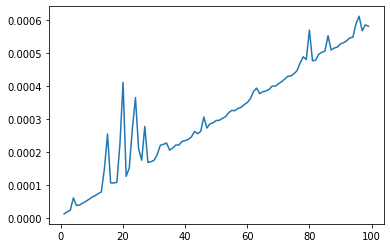

In [187]:
import matplotlib.pyplot as plt
plt.plot(size,runtime1)
# len(runtime)

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [188]:
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]
def qsort(lst):
    indices = [(0, len(lst))] #indice is a tuple of 2 elements

    while indices: #while indice is not empty
        (frm, to) = indices.pop() #assign from = 0 and to = len(lst)
        if frm == to: #if from = to skip the following operations
            continue

        # Find the partition:
        N = to - frm #N is the number of element in the list
        inds = [frm + int(N * n) for n in locations] #inds is a list of values following this rule
        values = [lst[ind] for ind in inds] #[a list of elements in the list whose indexes are in inds]
        partition = median(*values) #partition is the median value of the list values

        # Split into lists:
#         remove partition value out of the list. 
#         Otherwise partition will be included in lower list and then inserted back to the sort list 
#         to be in the middle of lst[frm:to] (see line 35)
          lst.remove(partition)
        #after the removal, lst[frm:to] loses one element, so we need to adjust indcies in the below operation from 'to' to 'to-1'accodingly
        lower = [a for a in lst[frm:to-1] if a <= partition] #split the list to 2 using the median threshold
        upper = [a for a in lst[frm:to-1] if a > partition]

        #count the frequence of the median value in the list


        ind1 = frm + len(lower) #the ending index of list 1


        # Push back into correct place:
        lst[frm:ind1] = lower #first part having all value smaller than or equal to the median value
        lst.insert(ind1,partition)
        lst[ind1+1:to] = upper #the seconde part having all values larger the median value

        # Enqueue other locations
#         append indexes of the first and third part of the list in indices
        indices.append((frm, ind1)) 
        indices.append((ind1+1, to))
    return lst

#     raise NotImplementedError()

In [189]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

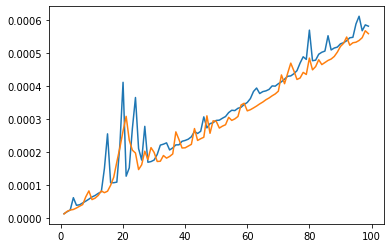

In [190]:
import matplotlib.pyplot as plt
size = list(range(1,100,1))
runtime2 = []
for N in size:
    subtime = []
    for _ in range(10): #repeat every input size 10 times
        subtime.append(timeit.timeit(randomized_quicksort, number=1))
    runtime2.append(sum(subtime)/len(subtime))

plt.plot(size,runtime1)
plt.plot(size,runtime2)
# raise NotImplementedError()
# raise NotImplementedError()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [191]:
def qsort(lst):
    indices = [(0, len(lst))] #indice is a tuple of 2 elements

    while indices: #while indice is not empty
        (frm, to) = indices.pop() #assign from = 0 and to = len(lst)
        if frm == to: #if from = to skip to the following operations
            continue


        partition = lst[frm] #partition is the median value of the list values

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition] #split the list to 2 using the median threshold
        upper = [a for a in lst[frm:to] if a > partition]
        #count the frequence of the median value in the list
        counts = sum([1 for a in lst[frm:to] if a == partition]) 

        ind1 = frm + len(lower) #the ending index of list 1
        ind2 = ind1 + counts #the ending index of the sublist of all median values (in line 48)

        # Push back into correct place:
        lst[frm:ind1] = lower #first part having all value smaller than the median value
        lst[ind1:ind2] = [partition] * counts #the median value
        lst[ind2:to] = upper #the third part of having all values larger the median value

        # Enqueue other locations
#         append indexes of the first and third part of the list in indices
        indices.append((frm, ind1)) 
        indices.append((ind2, to))
    return lst

#     raise NotImplementedError()

In [192]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



In [193]:
size = list(range(1,100,1))
runtime3 = []
for N in size:
    subtime = []
    for _ in range(10):
        subtime.append(timeit.timeit(randomized_quicksort, number=1))
    runtime3.append(sum(subtime)/len(subtime))
# raise NotImplementedError()
# raise NotImplementedError()

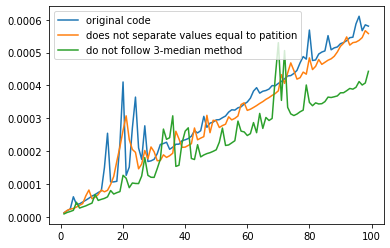

In [195]:
import matplotlib.pyplot as plt
plt.plot(size,runtime1)
plt.plot(size,runtime2)
plt.plot(size,runtime3)
plt.legend(['original code','does not separate values equal to patition','do not follow 3-median method'])

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


Given an input size of n, the number of splits(recursion) the recuresive quicksort has to call is lgn. To find the bound of n, we need to solve the equation: lgn<=500 -> n < 2^500